In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import time
from sklearn import neighbors 
from vast.voidfinder.voidfinder_functions import not_in_mask
import pickle

In [2]:
mask_file_name = "/Users/jordanconey/Documents/Summer_2021_REU/Delaunay_KIAS_Comp/kias1033_5_main_mask.pickle"

In [3]:
temp_infile = open(mask_file_name, "rb")
mask, mask_resolution = pickle.load(temp_infile)
temp_infile.close()

In [4]:
file_name1 = "/Users/jordanconey/Documents/Summer_2021_REU/Delaunay_KIAS_Comp/kias1033_5_MPAJHU_ZdustOS_main_comoving_holes.txt"

In [5]:
data_table_KIAS = Table.read(file_name1, format = "ascii.commented_header")

In [6]:
file_name2 = "/Users/jordanconey/Documents/Summer_2021_REU/Delaunay_KIAS_Comp/kias1033_5_MPAJHU_ZdustOS_main_comoving_maximal.txt"

In [7]:
data_table_KIAS_max = Table.read(file_name2, format = "ascii.commented_header")

In [8]:
file_name3 = "/Users/jordanconey/Documents/Summer_2021_REU/Delaunay_KIAS_Comp/kias_Delaunay_comoving_holes.txt"

In [9]:
data_table_DEL = Table.read(file_name3, format = "ascii.commented_header")

In [10]:
file_name4 = "/Users/jordanconey/Documents/Summer_2021_REU/Delaunay_KIAS_Comp/kias_Delaunay_comoving_maximal.txt"

In [11]:
data_table_DEL_max = Table.read(file_name4, format = "ascii.commented_header")

In [12]:
data_table_KIAS_max

x,y,z,radius,flag,r,ra,dec,volume
float64,float64,float64,float64,int64,float64,float64,float64,float64
-219.9766885730029,55.94592863332258,135.83440145223284,21.95110162006994,0,264.519706381349,165.73067997975286,30.898137131105038,107135.7890625
-262.97301589081854,-78.0620428087949,123.10641360359631,21.876257045873633,1,300.67204506660505,196.53322173210324,24.169504987853816,92289.0703125
-209.2393054610766,-128.41862226940606,146.04767844766113,21.676996619726033,2,285.6612572179811,211.5391234240106,30.74791185165335,106736.1875
-233.6904384725772,112.45201691586905,106.65059297778195,21.269610821890087,3,280.4122431786187,154.30310477089623,22.354435414074697,100854.6796875
-203.0956581165485,167.38486809752138,104.66285488783322,21.12429049841356,4,283.23109576296565,140.50575729206452,21.686735992041417,102092.1484375
-164.4736258947223,-14.868764797054645,11.03921163979978,20.84360377724462,5,165.51289368256323,185.16561850710912,3.8242949431463615,92148.5859375
-148.11476378155703,74.19692539372802,106.5660039111301,20.74034620068459,6,196.97583653213883,153.39178099729378,32.75245728606484,92345.6328125
-161.60334916133954,95.9151905156753,237.93966516032103,20.48709350738816,7,303.2006769260679,149.30992441324952,51.69845674463693,78632.7578125
-76.75901854682142,43.96911013189496,166.36715334524033,20.35402581850751,8,188.4230858633323,150.19505073037172,61.9996393863015,80748.921875


In [13]:
data_table_DEL_max

x,y,z,radius,flag,r,ra,dec
float64,float64,float64,float64,int64,float64,float64,float64
-88.54300503831762,78.3978756033475,285.09403353455804,30.903543070146824,0,308.6497992828396,138.47763300382033,67.47033201300044
-132.79413071805868,45.12264402986428,281.08606261708644,28.91498722475909,1,314.1332659158965,161.2325492021387,63.482595217704336
-252.25646361239666,109.21633897420905,162.8055078130035,27.39831392603776,2,319.479522829573,156.5894369187446,30.63692760831671
-187.11955322857884,248.42329025386113,-5.669716208038384,26.56269447848965,3,311.06270111168385,126.98810862846938,-1.044383651001706
-80.12982972684753,-89.00024303330407,224.1171402409994,26.300753900646715,4,254.106917304202,228.00225736655995,61.882102195544185
-55.09179741973023,-30.92558687303082,155.4190911057025,26.23323464589183,5,167.76946070873754,209.30752279085803,67.87811768246665
-41.226025025208436,23.37936660761396,140.11085173048258,25.023488370966025,6,147.9095355107087,150.44233548543767,71.31138417380853
-203.2331319750518,-165.4255705720986,181.94133792217764,24.721864660239284,7,319.01720294743546,219.14453818072514,34.77242237261827
-168.1436793612599,99.81379452616032,248.77381090738518,24.700639205133637,8,316.42297558843,149.3056982059852,51.83240600416255


In [14]:
data_table_KIAS

x,y,z,radius,flag
float64,float64,float64,float64,int64
-219.9766885730029,55.94592863332258,135.83440145223284,21.95110162006994,0
-220.21741807087918,56.19073149569401,135.51014212214145,21.903049082480397,0
-262.97301589081854,-78.0620428087949,123.10641360359631,21.876257045873633,1
-219.2393685386121,57.19205984583978,138.14161358191413,21.86925156999681,0
-263.5053924039993,-77.78813789825412,121.880462082608,21.845780366432756,1
-262.6349761952347,-77.3269428736158,122.212444979176,21.819939494857515,1
-263.6402162586579,-77.62925919423785,121.29660965568922,21.810939110198216,1
-219.09258618537393,57.44361459573706,139.08859914155698,21.7459176530405,0
-263.4902664858016,-78.28447672874928,124.71384427263908,21.70759769592309,1


In [15]:
data_table_DEL

x,y,z,radius,flag
float64,float64,float64,float64,int64
-88.54300503831762,78.3978756033475,285.09403353455804,30.903543070146824,0
-89.0304208366977,78.11711338344648,284.7499547334,30.55220344367577,0
-88.79618965782417,78.55990721859573,284.81764973337147,30.508285413715868,0
-100.68850465167363,72.89121516511904,290.82394182540213,30.42600429913977,0
-100.6847275460762,72.90077185875289,290.806548916123,30.411752069779094,0
-101.57638215784294,72.84803339514761,291.3456860183669,30.371880941086648,0
-132.79413071805868,45.12264402986428,281.08606261708644,28.91498722475909,1
-96.54287080736586,76.28971147623636,286.1233236283291,27.905724462428182,0
-132.71516952815279,42.63260074013522,279.95095633071935,27.522288662249583,1


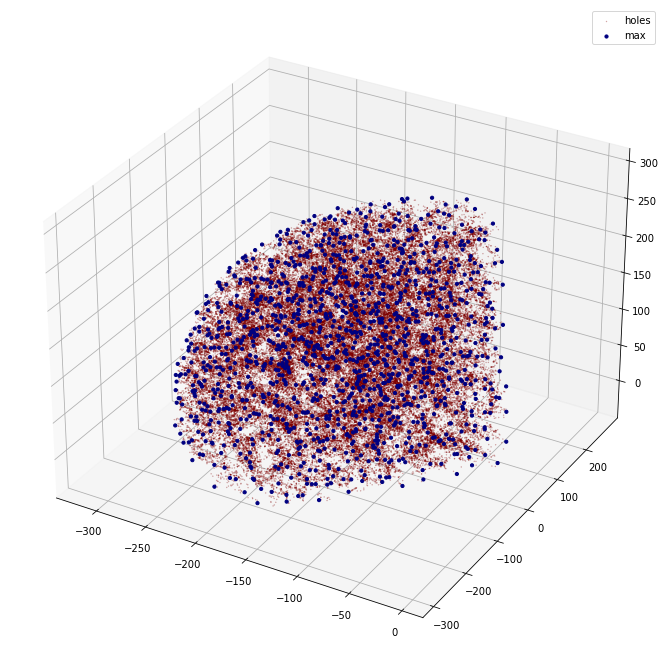

In [16]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(data_table_DEL['x'],data_table_DEL['y'], data_table_DEL['z'],
           color = 'maroon', s=0.1, alpha=0.5,
           label='holes')
ax.scatter(data_table_DEL_max['x'],data_table_DEL_max['y'], data_table_DEL_max['z'],
           color = 'navy', s=10, alpha=1.0,
           label='max')
# ax.set(xlabel='X [Mpc/h]', ylabel='Y [Mpc/h]', zlabel='Z [Mpc/h]')

ax.legend(loc='upper right', fontsize=10)

# plt.title("Maximal Sphere and Holes of NSA");

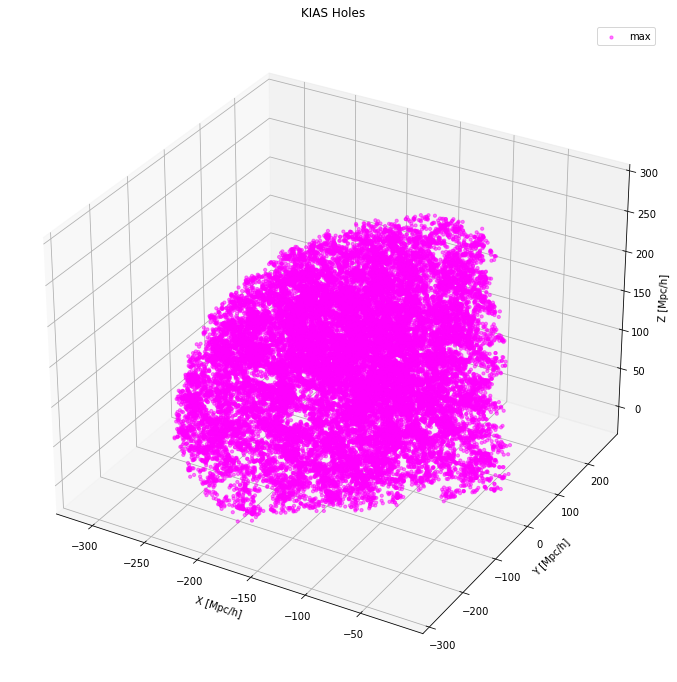

In [17]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(data_table_KIAS['x'],data_table_KIAS['y'], data_table_KIAS['z'],
           color = 'magenta', s=10, alpha=0.5,
           label='max')
ax.set(xlabel='X [Mpc/h]',
       ylabel='Y [Mpc/h]',
       zlabel='Z [Mpc/h]')

ax.legend(loc='upper right', fontsize=10)
plt.title("KIAS Holes");

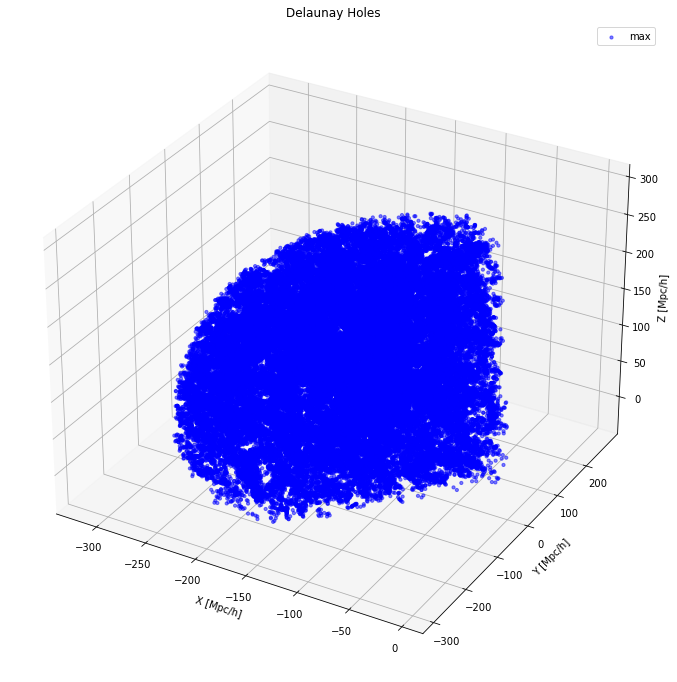

In [18]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(data_table_DEL['x'],data_table_DEL['y'], data_table_DEL['z'],
           color = 'blue', s=10, alpha=0.5,
           label='max')
ax.set(xlabel='X [Mpc/h]',
       ylabel='Y [Mpc/h]',
       zlabel='Z [Mpc/h]')

ax.legend(loc='upper right', fontsize=10)
plt.title("Delaunay Holes");

In [19]:
def calc_volume_boundaries(void_cat_A, void_cat_B):
    """Compute the boundaries of the minimal rectangular volume (parallelpiped)
    that completely contains two void catalogs.
    
    Parameters
    ----------
    void_cat_A : astropy.Table
        Table of void data from first catalog.
    void_cat_B : astropy.Table
        Table of void data from second catalog.
        
    Returns
    -------
    x_min : float
    x_max : float
    y_min : float
    y_max : float
    z_min : float
    z_max : float
    """
    x_min = np.minimum(np.min(void_cat_A['x']), np.min(void_cat_B['x']))
    x_max = np.maximum(np.max(void_cat_A['x']), np.max(void_cat_B['x']))
    
    y_min = np.minimum(np.min(void_cat_A['y']), np.min(void_cat_B['y']))
    y_max = np.maximum(np.max(void_cat_A['y']), np.max(void_cat_B['y']))

    z_min = np.minimum(np.min(void_cat_A['z']), np.min(void_cat_B['z']))
    z_max = np.maximum(np.max(void_cat_A['z']), np.max(void_cat_B['z']))

    return x_min, x_max, y_min, y_max, z_min, z_max

def generate_grid_points(x_min, x_max, y_min, y_max, z_min, z_max):
    """Creates a dense rectangular grid of points in 3D for the void volume calculation.
    
    Returns
    -------
    xyz : list
        2D list of points in 3D space.
    """
    x_range = np.arange(x_min, x_max)
    y_range = np.arange(y_min, y_max)
    z_range = np.arange(z_min, z_max)

    # Creating a meshgrid from the ranges to 
    X,Y,Z = np.meshgrid(x_range,y_range,z_range)

    x_points = np.ravel(X)
    y_points = np.ravel(Y)
    z_points = np.ravel(Z)
    
    point_coords = np.array([x_points, y_points, z_points])
    
    return point_coords

In [20]:
#This line creates the boundaries (like the whole min and max)
xmin, xmax, ymin, ymax, zmin, zmax = calc_volume_boundaries(data_table_KIAS, data_table_DEL)

#This line makes creates the points in between 
pts = generate_grid_points(xmin, xmax, ymin, ymax, zmin, zmax)

b = pts.shape
print(b)

(3, 57282435)


In [21]:
# This is the cell to filter out all the points that we do not want 🥴
start_time = time.time()

rmin = 0
rmax = 312.89816

points_boolean = np.ones(pts.shape[1], dtype = bool)

print(time.time() - start_time)

start_time = time.time()
for i in range(pts.shape[1]):
    
    #   print(pts[:,i].reshape((1,3)).shape)
    #   print(pts[:,i].reshape((1,3)))
    #   print(pts[:,i])
    points_boolean[i] = not_in_mask(pts[:,i].reshape((1,3)), mask, mask_resolution, rmin, rmax)        


points_in_mask = pts[:,~points_boolean]
print(time.time() - start_time)
print(points_in_mask.shape)
print(np.sum(points_boolean))
print(np.sum(~points_boolean))
print(points_boolean.shape)

0.023206710815429688


KeyboardInterrupt: 

In [ ]:
# should give me my good cone shape
start_time = time.time()
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(points_in_mask[0,:],points_in_mask[1,:], points_in_mask[2,:],
           color = 'blue', s=10, alpha=0.5,
           label='max')
ax.set(xlabel='X [Mpc/h]',
       ylabel='Y [Mpc/h]',
       zlabel='Z [Mpc/h]')

plt.title("Points in Mask");
print(time.time() - start_time)

In [ ]:
def point_query(point_coords, void_cat):
    """We are creating a function to make a KDTree to find the number of points in 
    and out of a catalogue.
    
    Parameters
    ----------
    point_coords: ndarray has a shape of (3,N)
        This is the list of points to query the given void catalogue. N is the number of points given. 
    void_cat: Astropy Table
        This is the given void catalogue.
    
    Returns
    -------
    true_inside: ndarray of shape (N,1)
        Is this the boolean array of length N (same length as point_coords). True means that 1 point 
        is inside the hole.
    """
    
    cx = void_cat['x']
    cy = void_cat['y']
    cz = void_cat['z']

    sphere_coords = np.array([cx, cy, cz])

    start_time = time.time()

    #The .T is meant to transpose the array from (3,1054) to (1054,3)
    sphere_tree = neighbors.KDTree(sphere_coords.T)

    print(time.time() - start_time)

    start_time = time.time()

    dist, idx = sphere_tree.query(point_coords.T, k = 1)

    true_inside = dist < void_cat['radius'][idx]
    
    return true_inside

In [ ]:
start_time = time.time()

true_inside_KIAS = point_query(points_in_mask, data_table_KIAS)

count_in_KIAS = np.sum(true_inside_KIAS)

# The "~" inverts the array. So we have true_inside inverted to add up the falses instead of the trues
count_out_KIAS = np.sum(~true_inside_KIAS)
print(time.time() - start_time)

total_KIAS = count_in_KIAS + count_out_KIAS

true_inside_DEL = point_query(points_in_mask, data_table_DEL)

count_in_DEL = np.sum(true_inside_DEL)

# The "~" inverts the array. So we have true_inside inverted to add up the falses instead of the trues
count_out_DEL = np.sum(~true_inside_DEL)

total_DEL = count_in_DEL + count_out_DEL

print(time.time() - start_time)
print('\nNumber of points inside KIAS: {}'.format(count_in_KIAS))
print('\nNumber of points outside KIAS: {}'.format(count_out_KIAS))
print('\nNumber of points inside Delaunay: {}'.format(count_in_DEL))
print('\nNumber of points outside Delaunay: {}'.format(count_out_DEL))
print("\nThis is the total number of points KIAS: {}".format(total_KIAS))
print("\nThis is the total number of points in Delaunay: {}".format(total_DEL))

## This is the number of points that are inside both A and B

In [ ]:
inside_A_and_B = np.logical_and(true_inside_KIAS, true_inside_DEL)

np.sum(inside_A_and_B), count_in_KIAS, count_in_DEL

## This is the number of points that are in neither A and B


In [ ]:
not_inside_A_and_B = np.logical_and(~true_inside_KIAS, ~true_inside_DEL)

np.sum(not_inside_A_and_B), count_in_KIAS, count_in_DEL

## This is the number of points that are in A but not B

In [ ]:
inside_A = np.logical_and(true_inside_KIAS, ~true_inside_DEL)

np.sum(inside_A)

## This is the number of points that are not in A but are in B

In [ ]:
inside_B = np.logical_and(~true_inside_KIAS, true_inside_DEL)

np.sum(inside_B)

# Fraction of points: Calculate the ratios of the given sums

- in A
- in B
- in A & B
- in neither A nor B
- {in A, not B
- {in B, not A
-   |
-   |
- \ /
- The closer they are to zero, the more similar they are

## This is the ratio of A

In [ ]:
r_A = count_in_KIAS / total_KIAS
print(r_A)

## This is the ratio of B


In [ ]:
r_B = count_in_DEL / total_KIAS
print(r_B)

## This is the ratio of A & B

In [ ]:
r_AB = np.sum(inside_A_and_B) / total_KIAS
print(r_AB)

## This is the ratio of neither A nor B


In [ ]:
r_notAB = np.sum(not_inside_A_and_B) / total_KIAS
print(r_notAB)

## This is the ratio of A and not B


In [ ]:
r_A_not_B = np.sum(inside_A) / total_KIAS
print(r_A_not_B)

## This is the ratio of B and not A

In [ ]:
r_B_not_A = np.sum(inside_B) / total_KIAS
print(r_B_not_A)

In [ ]:
Sum = r_AB + r_notAB + r_A_not_B + r_B_not_A
Sum